# Pioneer MAB Profiler Example
Written by Sage Lichtenwalner, Rutgers University, June 2, 2024

In this notebook, we will briefly demonstrate how to access and plot **profiler** data from the new **Ocean Observatories Initiative** (OOI) **Pioneer Mid Atlantic Bight** (MAB) Array.  The array was deployed in April 2024 off the coast of North Carolina, a bit north of Cape Hatteras. While there are a number of ways to access data from the OOI, we will use the relatively new OOI ERDDAP data server, which provides a straightforward way to request and download data.  

This example will highlight how to plot a profile timeseries of CTD and Fluorometry (chlorophyll) data.  We will also show how to subset a few profiles so they can be plotted individually.

**At the end of this notebook activity, you will be able to:**
* Understand how to use the *erddapy* library to easily load data from the OOI ERDDAP data server into a programming environment
* Generate profile timeseries plots of of temperature, salinity and chlorophyll data
* Sub-select a specific time period to pull out specific profiles
* Generate profile plots of the same variables.

In [1]:
# Install erddapy
# !pip install erddapy

In [2]:
# Notebook Setup
from erddapy import ERDDAP
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Setup Erddap connection
server = "https://erddap.dataexplorer.oceanobservatories.org/erddap/"
e = ERDDAP(
    server=server,
    protocol="tabledap",
    response="csv",
)

In [4]:
# Load the Wave Data
url_wave = e.get_download_url(
    dataset_id = "ooi-cp14sepm-wfp01-04-flortk000",
    constraints = {
      "time>=": "2024-05-01",
      "time<=": "2024-06-01",
    }
)
print(url_wave)

df = pd.read_csv(url_wave, index_col='time', parse_dates=True, skiprows=[1])
df.head()

https://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-cp14sepm-wfp01-04-flortk000.csv?&time>=1714521600.0&time<=1717200000.0


,latitude,longitude,z,cdomflo_profiler_depth_enabled,mass_concentration_of_chlorophyll_a_in_sea_water_profiler_depth_enabled,flubsct_profiler_depth_enabled,sea_water_practical_salinity_profiler_depth_enabled,sea_water_pressure_profiler_depth_enabled,sea_water_temperature_profiler_depth_enabled,station
time,,,,,,,,,,
2024-05-01 00:02:00+00:00,35.8552,-74.8509,-105.0,4.15426,0.00000,0.003164,34.594128,105.39,13.3632,NaN
2024-05-01 00:02:00+00:00,35.8552,-74.8509,-104.0,3.88333,0.02430,0.002527,34.584270,104.36,13.3450,NaN
2024-05-01 00:02:00+00:00,35.8552,-74.8509,-103.0,4.06395,0.00000,0.003581,34.591278,103.39,13.3710,NaN
2024-05-01 00:03:00+00:00,35.8552,-74.8509,-118.0,4.06395,-0.01215,0.002549,34.759940,118.57,13.6795,NaN
2024-05-01 00:03:00+00:00,35.8552,-74.8509,-116.0,4.06395,0.01215,0.002681,34.754983,117.29,13.6810,NaN


In [5]:
# Quick list of variabless
df.dtypes

latitude                                                                   float64
longitude                                                                  float64
z                                                                          float64
cdomflo_profiler_depth_enabled                                             float64
mass_concentration_of_chlorophyll_a_in_sea_water_profiler_depth_enabled    float64
flubsct_profiler_depth_enabled                                             float64
sea_water_practical_salinity_profiler_depth_enabled                        float64
sea_water_pressure_profiler_depth_enabled                                  float64
sea_water_temperature_profiler_depth_enabled                               float64
station                                                                    float64
dtype: object

## Plotting a Profile Timeseries
Now that we've loaded the data, let's make a quick plot of the temperature profiles.  Do do this, we're going to create a scatter plot, which will just plot all the data as dots (by default) on top of each other.  We can adjust the size of the dots using the `s=5` parameter.  

We will also specify a colormap for the data using the `cmap` parameter.  Matplotlib has a lot of [built-in colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) you can use.  

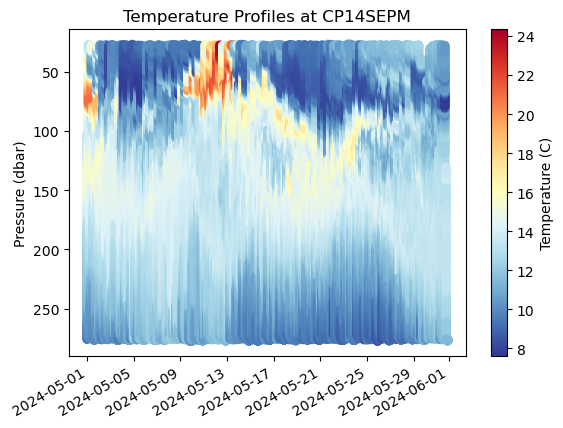

In [6]:
fig, ax = plt.subplots()
plt.scatter(df.index, df.sea_water_pressure_profiler_depth_enabled, c=df.sea_water_temperature_profiler_depth_enabled, cmap='RdYlBu_r')
plt.colorbar(label='Temperature (C)')

# # Flip the y-axis
plt.gca().invert_yaxis()

# We need to rotate the ticks
fig.autofmt_xdate()

ax.set_ylabel('Pressure (dbar)')
ax.set_title('Temperature Profiles at CP14SEPM');

Next, let's make a more advanced figure that includes temperature, salinity and chlorophyll.

We will also import the [cmocean](https://matplotlib.org/cmocean/) colormap library, which adds several addtinoal colormaps specifically designed for oceanography.

Note, you can also use the `vmin` and `vmax` parameters in the scatter plot to manually set the color limits.  But for now, we will leave them as automatic, which covers the full range of data.  If you have outliers, you may find it useful to specific max and/or minimum limits.  See the [scatter documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter) for more.

In [7]:
# !pip install cmocean
import cmocean

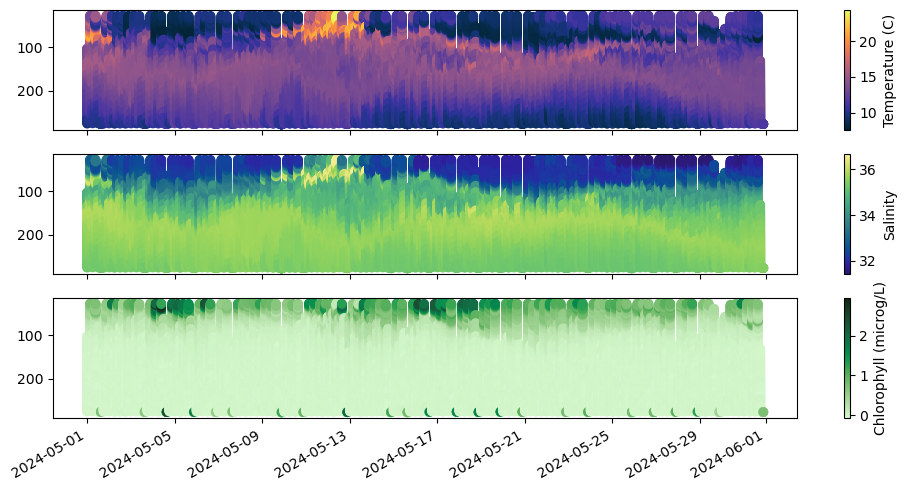

In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(12,6))

sc1 = ax1.scatter(df.index, df.sea_water_pressure_profiler_depth_enabled, c=df.sea_water_temperature_profiler_depth_enabled, cmap=cmocean.cm.thermal)
plt.colorbar(sc1, label='Temperature (C)')

sc2 = ax2.scatter(df.index, df.sea_water_pressure_profiler_depth_enabled, c=df.sea_water_practical_salinity_profiler_depth_enabled, cmap=cmocean.cm.haline)
plt.colorbar(sc2, label='Salinity')

sc3 = ax3.scatter(df.index, df.sea_water_pressure_profiler_depth_enabled, c=df.mass_concentration_of_chlorophyll_a_in_sea_water_profiler_depth_enabled, cmap=cmocean.cm.algae)
plt.colorbar(sc3, label='Chlorophyll (microg/L)')

# # Flip the y-axis
plt.gca().invert_yaxis()

# We need to rotate the ticks
fig.autofmt_xdate()

ax.set_title('Profiles at CP14SEPM');

## Subsetting profiles
Plotting a lot of profiles is great, but what if we only want to plot a few?  A quick way is to pull out a specific time period for the profile(s) you wish to plot.  As an example, let's pull out the profiles on May 5th.  There are actually a [few ways](https://stackoverflow.com/questions/22898824/filtering-pandas-dataframes-on-dates) we can do this, like everythign in python ;)

In [9]:
# Filter the timeseries
df_sub = df[(df.index>'2024-05-05') & (df.index<'2024-05-06')]
# Select one profile
df_sub2 = df[(df.index>'2024-05-05 03') & (df.index<'2024-05-05 04')]

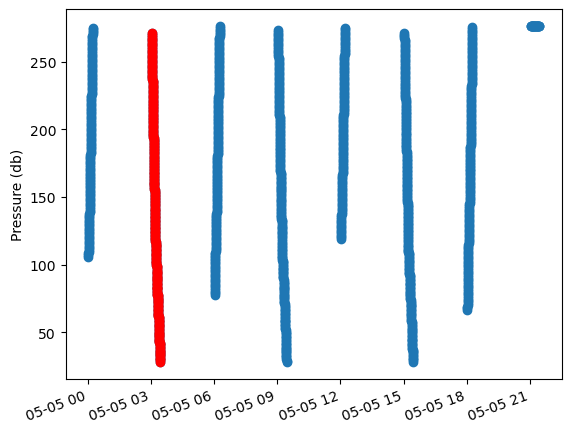

In [10]:
# Plot the pressure timeseries
fig,ax = plt.subplots()
# df_sub.plot(use_index=True, y='sea_water_pressure_profiler_depth_enabled', ax=ax)
# df_sub2.plot(use_index=True, y='sea_water_pressure_profiler_depth_enabled', ax=ax)
plt.scatter(df_sub.index, df_sub.sea_water_pressure_profiler_depth_enabled)
plt.scatter(df_sub2.index, df_sub2.sea_water_pressure_profiler_depth_enabled, color='red')
plt.xticks(rotation=20, horizontalalignment='right')
plt.ylabel('Pressure (db)');

## PLotting a vertical rofile

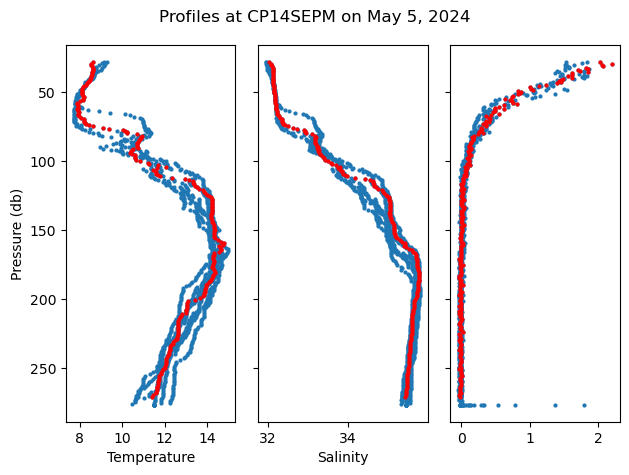

In [11]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, sharey=True)

# Plot all profiles from the day
ax1.scatter(df_sub.sea_water_temperature_profiler_depth_enabled, df_sub.sea_water_pressure_profiler_depth_enabled, s=4)
ax2.scatter(df_sub.sea_water_practical_salinity_profiler_depth_enabled, df_sub.sea_water_pressure_profiler_depth_enabled, s=4)
ax3.scatter(df_sub.mass_concentration_of_chlorophyll_a_in_sea_water_profiler_depth_enabled, df_sub.sea_water_pressure_profiler_depth_enabled, s=4)

# Plot the 2nd profile in red
ax1.scatter(df_sub2.sea_water_temperature_profiler_depth_enabled, df_sub2.sea_water_pressure_profiler_depth_enabled, s=4, c='red')
ax2.scatter(df_sub2.sea_water_practical_salinity_profiler_depth_enabled, df_sub2.sea_water_pressure_profiler_depth_enabled, s=4, c='red')
ax3.scatter(df_sub2.mass_concentration_of_chlorophyll_a_in_sea_water_profiler_depth_enabled, df_sub2.sea_water_pressure_profiler_depth_enabled, s=4, c='red')

plt.gca().invert_yaxis()

ax1.set_ylabel('Pressure (db)')
ax1.set_xlabel('Temperature')
ax2.set_xlabel('Salinity')
fig.suptitle('Profiles at CP14SEPM on May 5, 2024')
fig.tight_layout()

## TS Diagram
For fun, let's make a TS (temperature & salinity) diagram for the profile we pulled out.  We will map the color to the presure (depth)


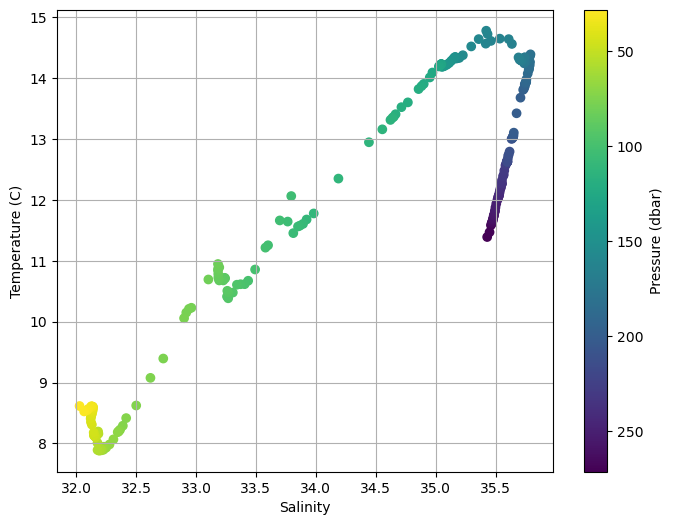

In [12]:
# T-S Diagram with depth
plt.figure(figsize=(8,6))
plt.scatter(df_sub2.sea_water_practical_salinity_profiler_depth_enabled, df_sub2.sea_water_temperature_profiler_depth_enabled, 
            c=df_sub2.sea_water_pressure_profiler_depth_enabled, cmap='viridis_r')

cbh = plt.colorbar(label='Pressure (dbar)');
cbh.ax.invert_yaxis()

plt.xlabel('Salinity')
plt.ylabel('Temperature (C)')


fig.suptitle('Profiles at CP14SEPM on May 5, 2024');
plt.grid()


Finally, let's add the lines of constant density to show how the varrying temperature and salinity impact density together.

In [13]:
# !pip install seawater
import seawater # Need to update to gsw functions
import numpy as np

/var/folders/mz/ql7rs9ks275g1s0ptc3k3vhh0000gn/T/ipykernel_2280/146953689.py:2: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater # Need to update to gsw functions


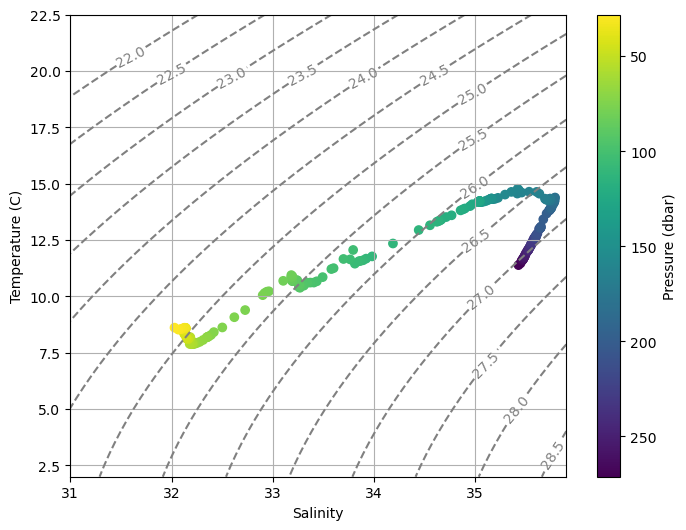

In [14]:
# TS Diagram with density contours
plt.figure(figsize=(8,6))

# Calculate the density lines
x = np.arange(31, 36, .1)
y = np.arange(2, 23, .5)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

# Plot the contour lines
CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.5))
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')

# Plot the data
plt.scatter(df_sub2.sea_water_practical_salinity_profiler_depth_enabled, df_sub2.sea_water_temperature_profiler_depth_enabled, 
            c=df_sub2.sea_water_pressure_profiler_depth_enabled, cmap='viridis_r')
plt.xlabel('Salinity')
plt.ylabel('Temperature (C)')
fig.suptitle('Profiles at CP14SEPM on May 5, 2024');
plt.grid()

# Add a colorbar
cbh = plt.colorbar(label='Pressure (dbar)');
cbh.ax.invert_yaxis()